ANALYSIS

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [10]:
import pandas as pd

# Step 1: Detect the delimiter automatically
df = pd.read_csv("/Users/sara/projects/smba/data/processed/final_cleaned_genai_data.csv", sep=None, engine="python")

print(df.head())

# data
df = pd.read_csv("/Users/sara/projects/smba/data/processed/final_cleaned_genai_data.csv")

   Unnamed: 0 employment_status               industry  \
0           0               Yes  IT / Tech, Consulting   
1           1               Yes                    Law   
2           2               Yes              IT / Tech   
3           3               Yes              IT / Tech   
4           4               Yes       Creative / Media   

              current_role years_of_experience  \
0                      CEO  More than 15 years   
1                Attorney            1–3 years   
2                      SDE           1–3 years   
3  ERP Finance Consultant            4–7 years   
4       Marketing manager            4–7 years   

                                  genai_org_approval genai_use  \
0  ChatGPT (OpenAI), Google Gemini (Formerly Bard...       Yes   
1                                   ChatGPT (OpenAI)       Yes   
2                                                 no       Yes   
3                                   ChatGPT (OpenAI)       Yes   
4                   

In [13]:
df.head(19)

,Unnamed: 0,employment_status,industry,current_role,years_of_experience,genai_org_approval,genai_use,genai_tools_used,genai_frequency_use,genai_importance,...,reliance,decision_making_confidence,quality_improvement,peers_approval,manager_support,general_disapproval,age_group,gender,highest_level_of_education,country_of_residence
0,0,Yes,"IT / Tech, Consulting",CEO,More than 15 years,"ChatGPT (OpenAI), Google Gemini (Formerly Bard...",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard...",Daily,1.0,...,3.0,3.0,4.0,5.0,5.0,5.0,62,Male,Bachelor’s degree,Brazil
1,1,Yes,Law,Attorney,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,1.0,2.0,4.0,5.0,5.0,5.0,26-35,Female,Bachelor’s degree,Brazil
2,2,Yes,IT / Tech,SDE,1–3 years,no,Yes,"ChatGPT (OpenAI), Claude (Anthropic)",A few times a week,3.0,...,4.0,4.0,4.0,4.0,3.0,3.0,18-25,Male,Master’s degree,Canada
3,3,Yes,IT / Tech,ERP Finance Consultant,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,2.0,...,4.0,4.0,5.0,3.0,2.0,2.0,26-35,Female,Bachelor’s degree,Canada
4,4,Yes,Creative / Media,Marketing manager,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,1.0,...,5.0,4.0,5.0,5.0,1.0,4.0,26-35,Male,Bachelor’s degree,Egypt
5,5,Yes,Pre sales in,Pre sale employee,Less than 1 year,"ChatGPT (OpenAI), Google Gemini (Formerly Bard)",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard)",Daily,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,26-35,Female,Bachelor’s degree,Egypt
6,6,Yes,IT / Tech,Tester,1–3 years,"ChatGPT (OpenAI), Google Gemini (Formerly Bard...",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard...",A few times a week,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,18-25,Male,Bachelor’s degree,Germany
7,7,Yes,IT / Tech,Intern in Corporate IT,1–3 years,Microsoft Copilot,Yes,"ChatGPT (OpenAI), Microsoft Copilot",Daily,1.0,...,3.0,3.0,5.0,4.0,4.0,4.0,26-35,Female,Bachelor’s degree,Germany
8,8,Yes,Education / Academia,Master's Thesis Student,1–3 years,"ChatGPT (OpenAI), Claude (Anthropic)",Yes,ChatGPT (OpenAI),A few times a week,3.0,...,1.0,1.0,1.0,3.0,3.0,3.0,26-35,Male,Bachelor’s degree,Germany
9,9,Yes,Education / Academia,Team assistant,1–3 years,NaN,Yes,"ChatGPT (OpenAI), Deepseek, Google AI Studio",Daily,5.0,...,5.0,5.0,5.0,NaN,NaN,NaN,26-35,Female,Master’s degree,Germany


In [16]:
df["self_efficacy"] = df.iloc[:,9:18].mean(axis=1)
df["self_efficacy"]

0      4.111111
1      3.222222
2      3.777778
3      3.666667
4      4.000000
         ...   
114    4.000000
115         NaN
116    3.777778
117         NaN
118    3.555556
Name: self_efficacy, Length: 119, dtype: float64

In [17]:
df['relatedness_score'] = df.iloc[:,18]

In [18]:
df['dependence_score'] = df.iloc[:, 21:23].mean(axis=1)

In [19]:
df['dependence_score']

0      3.0
1      1.0
2      3.5
3      4.0
4      5.0
      ... 
114    3.5
115    NaN
116    2.5
117    NaN
118    2.5
Name: dependence_score, Length: 119, dtype: float64

In [20]:
df["ai_score"] = df[["relatedness_score", "dependence_score", "emotional_energy_score"]].mean(axis=1)

KeyError: "['emotional_energy_score'] not in index"

In [42]:
df["ai_score"]

0      4.000000
1      1.666667
2      2.500000
3      3.666667
4      4.000000
         ...   
113         NaN
114    2.166667
115         NaN
116    1.500000
117         NaN
Name: ai_score, Length: 118, dtype: float64

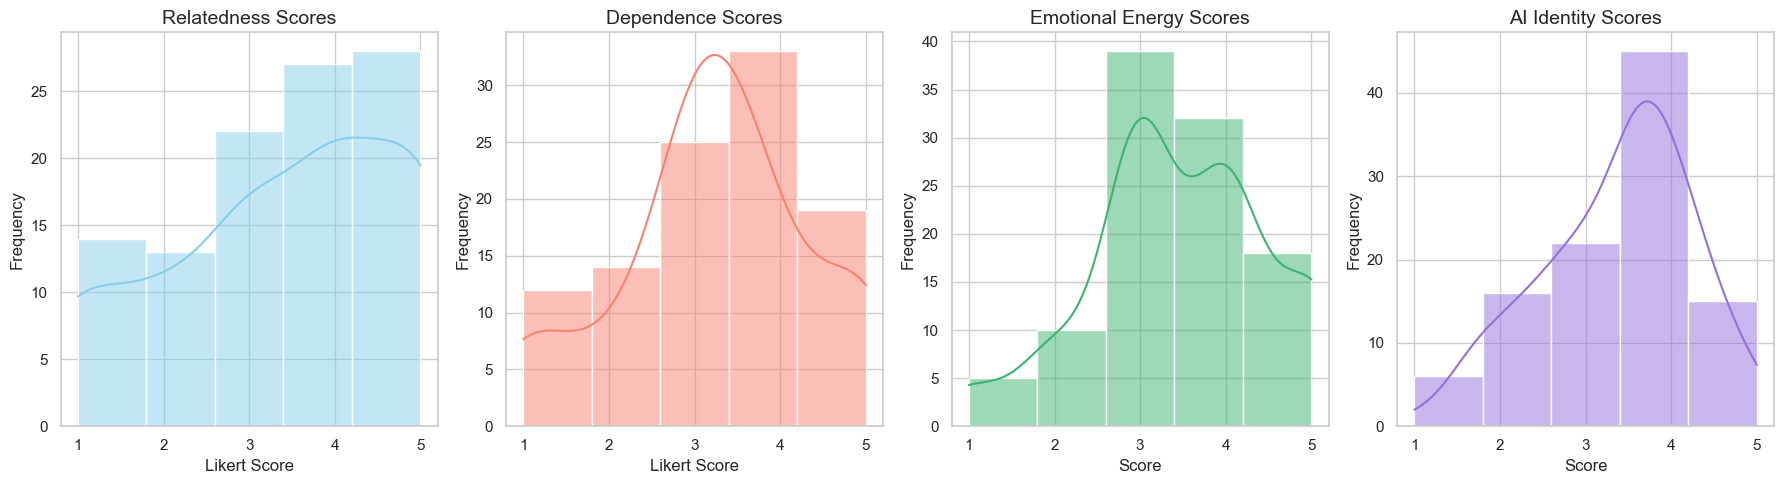

In [43]:
df_relatedness = df["relatedness_score"]
df_dependence = df["dependence_score"]
df_emotion = df["emotional_energy_score"]
df_ai = df["ai_score"]

# Create a figure with 3 side-by-side subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=False)

# Plot 1: Relatedness
sns.histplot(df_relatedness, bins=5, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title('Relatedness Scores', fontsize=14)
axes[0].set_xlabel('Likert Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_xticks([1, 2, 3, 4, 5])

# Plot 2: Dependence
sns.histplot(df_dependence, bins=5, kde=True, ax=axes[1], color="salmon")
axes[1].set_title('Dependence Scores', fontsize=14)
axes[1].set_xlabel('Likert Score', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_xticks([1, 2, 3, 4, 5])

# Plot 3: Emotional Energy
sns.histplot(df_emotion, bins=5, kde=True, ax=axes[2], color="mediumseagreen")
axes[2].set_title('Emotional Energy Scores', fontsize=14)
axes[2].set_xlabel('Score', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_xticks([1, 2, 3, 4, 5])

# Plot 4: General AI score
sns.histplot(df_ai, bins=5, kde=True, ax=axes[3], color="mediumpurple")
axes[3].set_title('AI Identity Scores', fontsize=14)
axes[3].set_xlabel('Score', fontsize=12)
axes[3].set_ylabel('Frequency', fontsize=12)
axes[3].set_xticks([1, 2, 3, 4, 5])

# Adjust spacing
plt.tight_layout()
plt.show()

In [44]:
# hypothesis 1
df1 = df.dropna(subset=['years_of_experience', 'ai_score'])

experience_mapping = {
    "Less than 1 year": 0.5,
    "1–3 years": 2,
    "4–7 years": 5.5,
    "8–15 years": 11.5,
    "More than 15 years": 20,
    "24": 20  # or treat as 24 if it seems valid
}

# Apply mapping to create numeric column
df1['years_of_experience_numeric'] = df['years_of_experience'].map(experience_mapping)

# Optional: check result
print(df1[['years_of_experience', 'years_of_experience_numeric']].dropna().head())

# Define X (predictor) and y (outcome)
X = df1['years_of_experience_numeric']
y = df1['ai_score']

# Add a constant term to the predictor
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

  years_of_experience  years_of_experience_numeric
0  More than 15 years                         20.0
1           1–3 years                          2.0
2           1–3 years                          2.0
3           4–7 years                          5.5
4           4–7 years                          5.5
                            OLS Regression Results                            
Dep. Variable:               ai_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.06641
Date:                Sun, 10 Aug 2025   Prob (F-statistic):              0.797
Time:                        15:34:39   Log-Likelihood:                -133.47
No. Observations:                 104   AIC:                             270.9
Df Residuals:                     102   BIC:                             276.2
Df Model:                           1                         

/var/folders/n9/yg63xqcd1nv0nhlmydlzkkbc0000gn/T/ipykernel_28201/2616170499.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['years_of_experience_numeric'] = df['years_of_experience'].map(experience_mapping)


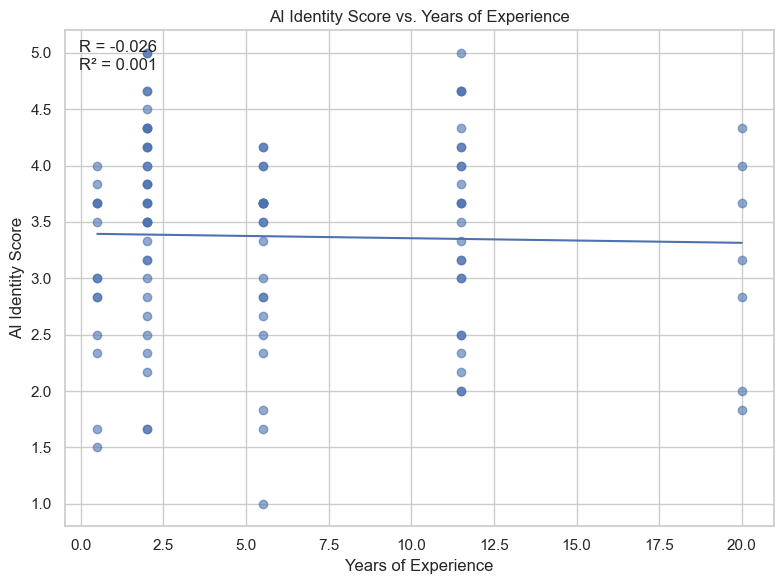

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Prep data ---
df_plot = df1[['years_of_experience_numeric', 'ai_score']].dropna()
x = df_plot['years_of_experience_numeric'].to_numpy()
y = df_plot['ai_score'].to_numpy()

# --- Fit OLS (simple linear regression) ---
X = sm.add_constant(x)  # intercept
model = sm.OLS(y, X).fit()

intercept = model.params[0]
slope = model.params[1]
r_squared = model.rsquared
# Signed Pearson r from R² and slope sign
r = (r_squared ** 0.5) * (1 if slope >= 0 else -1)

# --- Prepare regression line for plotting ---
x_line = np.linspace(x.min(), x.max(), 200)
y_line = intercept + slope * x_line

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6)
plt.plot(x_line, y_line)

plt.title('AI Identity Score vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('AI Identity Score')

# Annotate with R and R² (upper-left inside the axes)
ax = plt.gca()
ax.text(0.02, 0.98, f'R = {r:.3f}\nR² = {r_squared:.3f}',
        transform=ax.transAxes, ha='left', va='top')

plt.tight_layout()
plt.show()

In [46]:
# h2
import pandas as pd
from scipy import stats

# Drop missing values in relevant columns
df_anova = df.dropna(subset=['country_of_residence', 'ai_score'])

# Group AI scores by region
groups = [group['ai_score'].values for name, group in df_anova.groupby('country_of_residence')]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 1.4899
P-value: 0.1313


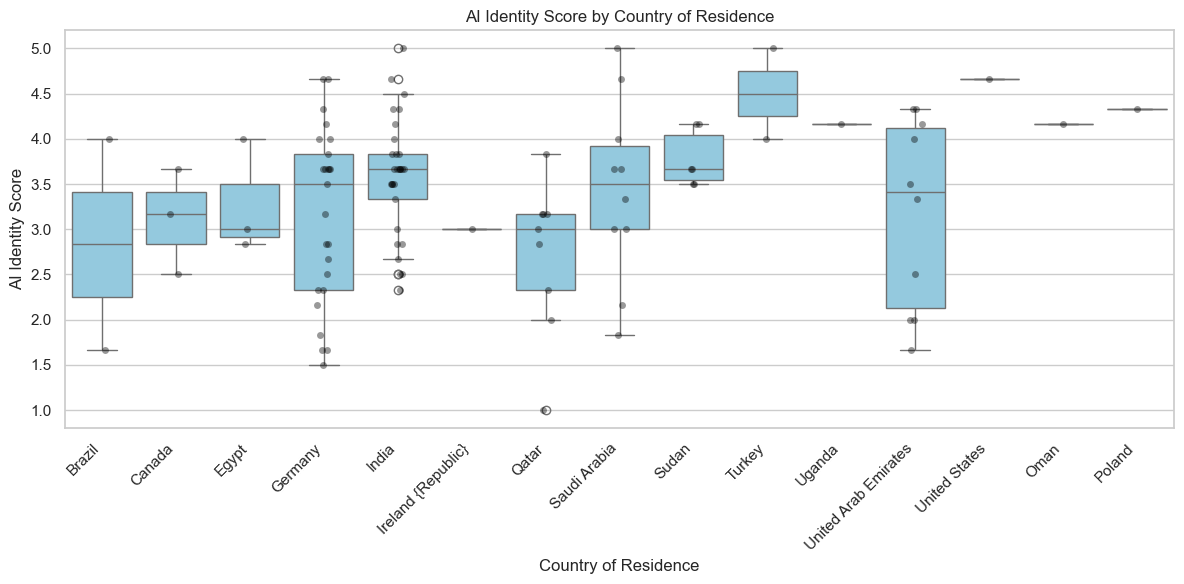

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for relevant columns
df_plot = df.dropna(subset=['country_of_residence', 'ai_score'])

# Set style
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='country_of_residence',
    y='ai_score',
    data=df_plot,
    color="skyblue"
)

# Add swarmplot for individual data points (optional)
sns.stripplot(
    x='country_of_residence',
    y='ai_score',
    data=df_plot,
    color='black',
    alpha=0.4,
    jitter=True,
)

# Labels and title
plt.title('AI Identity Score by Country of Residence')
plt.xlabel('Country of Residence')
plt.ylabel('AI Identity Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [48]:
from scipy.stats import kruskal

# Drop NaNs
df_kw = df.dropna(subset=['country_of_residence', 'ai_score'])

# Create list of ai_score arrays for each country
groups = [group['ai_score'].values for name, group in df_kw.groupby('country_of_residence')]

# Run Kruskal–Wallis test
h_stat, p_value = kruskal(*groups)
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value:.4f}")

H-statistic: 19.3389
P-value: 0.1524


In [49]:
import statsmodels.api as sm
import pandas as pd

# Drop NaNs
df_reg = df.dropna(subset=['country_of_residence', 'ai_score'])

# Create dummy variables
country_dummies = pd.get_dummies(df_reg['country_of_residence'], drop_first=True)

# Define predictors and outcome
X = sm.add_constant(country_dummies)
y = df_reg['ai_score']

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [50]:
import numpy as np
import pandas as pd

# Load your dataset
df_perm = df[['country_of_residence', 'ai_score']].dropna()
df_perm['ai_score'] = pd.to_numeric(df_perm['ai_score'], errors='coerce')
df_perm = df_perm.dropna(subset=['ai_score'])

# Actual test statistic: one-way ANOVA F-stat
def f_statistic(data):
    groups = [group['ai_score'].values for _, group in data.groupby('country_of_residence')]
    overall_mean = data['ai_score'].mean()
    ss_between = sum(len(g) * (g.mean() - overall_mean) ** 2 for g in groups)
    ss_within = sum(((g - g.mean()) ** 2).sum() for g in groups)
    df_between = len(groups) - 1
    df_within = len(data) - len(groups)
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within
    return ms_between / ms_within

# Observed F-statistic
observed_f = f_statistic(df_perm)

# Permutation procedure
n_permutations = 10000
perm_stats = np.zeros(n_permutations)

for i in range(n_permutations):
    shuffled = df_perm.copy()
    shuffled['ai_score'] = np.random.permutation(shuffled['ai_score'].values)
    perm_stats[i] = f_statistic(shuffled)

# p-value: proportion of permuted stats >= observed stat
p_value = np.mean(perm_stats >= observed_f)

print(f"Observed F-statistic: {observed_f:.4f}")
print(f"P-value (permutation test): {p_value:.4f}")

Observed F-statistic: 1.4899
P-value (permutation test): 0.1254


In [15]:
import numpy as np
import pandas as pd

# Filter for only Germany and India
df_two = df[df['country_of_residence'].isin(['Germany', 'India'])].copy()
df_two['ai_score'] = pd.to_numeric(df_two['ai_score'], errors='coerce')
df_two = df_two.dropna(subset=['ai_score'])

# Observed mean difference (Germany - India)
mean_diff_obs = (
    df_two[df_two['country_of_residence'] == 'Germany']['ai_score'].mean()
    - df_two[df_two['country_of_residence'] == 'India']['ai_score'].mean()
)

# Permutation test
n_permutations = 10000
perm_diffs = np.zeros(n_permutations)

for i in range(n_permutations):
    shuffled = np.random.permutation(df_two['ai_score'].values)
    df_two['shuffled_score'] = shuffled
    perm_diffs[i] = (
        df_two[df_two['country_of_residence'] == 'Germany']['shuffled_score'].mean()
        - df_two[df_two['country_of_residence'] == 'India']['shuffled_score'].mean()
    )

# Two-tailed p-value
p_value = np.mean(np.abs(perm_diffs) >= abs(mean_diff_obs))

print(f"Observed mean difference (Germany - India): {mean_diff_obs:.4f}")
print(f"Permutation test p-value: {p_value:.4f}")

KeyError: 'ai_score'

In [52]:
df3 = pd.read_csv("updated_emotional_analysis-2.csv")

In [53]:
df3

,Unnamed: 0,employment_status,industry,current_role,years_of_experience,genai_org_approval,genai_use,genai_tools_used,genai_frequency_use,genai_importance,...,emotion_curiosity,emotion_excitement,emotion_pride_empowerment,emotion_shame_guilt,emotion_anxiety,emotion_discomfort,emotion_fear,emotion_neutral,emotion_other_emotional_state,emotional_energy_codes_str
0,0,Yes,"IT / Tech, Consulting",CEO,More than 15 years,"ChatGPT (OpenAI), Google Gemini (Formerly Bard...",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard...",Daily,1.0,...,0,0,0,0,0,0,0,0,1,Other Emotional State
1,1,Yes,Law,Attorney,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,0,0,0,0,0,0,0,0,1,Other Emotional State
2,2,Yes,IT / Tech,SDE,1–3 years,no,Yes,"ChatGPT (OpenAI), Claude (Anthropic)",A few times a week,3.0,...,0,0,0,1,0,0,0,1,0,Shame & Guilt; Neutral
3,3,Yes,IT / Tech,ERP Finance Consultant,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,2.0,...,0,0,0,1,0,0,0,0,0,Shame & Guilt
4,4,Yes,Creative / Media,Marketing manager,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,1.0,...,0,0,0,0,0,0,0,0,0,Pragmatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,Yes,Education / Academia,Student,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,0,0,0,1,0,0,0,0,0,Shame & Guilt
115,115,Yes,Healthcare,Student assistant,1–3 years,I don't know for sure,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
116,116,Yes,Education / Academia,SHK,Less than 1 year,NaN,Yes,ChatGPT (OpenAI),A few times a week,4.0,...,0,0,0,1,0,0,0,1,0,Pragmatic; Shame & Guilt; Neutral
117,117,Yes,Oil and Gas,Section Head Production Operation,More than 15 years,NaN,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


In [54]:
df3.shape

(119, 47)

In [55]:
last_col = df3.columns[-1]
df_merged = df.merge(df3[[ 'Unnamed: 0', last_col ]], on='Unnamed: 0', how='left')

In [56]:
df_merged.shape

(118, 38)

In [57]:
df_anova2 = df_merged.dropna(subset=['emotional_energy_codes_str', 'ai_score'])

# Group AI scores by region
groups = [group['ai_score'].values for name, group in df_anova2.groupby('emotional_energy_codes_str')]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 1.6922
P-value: 0.0451


In [58]:
# Tukey's HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df_anova2['ai_score'],                # dependent variable
    groups=df_anova2['emotional_energy_codes_str'],  # group variable
    alpha=0.05
)

print(tukey)

                                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                                  
                 group1                                   group2                  meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------------------------------------
                              Competence                   Competence; Excitement  -0.0417    1.0 -3.6376 3.5542  False
                              Competence                      Competence; Neutral  -0.2083    1.0 -3.8042 3.3876  False
                              Competence                    Competence; Pragmatic  -0.4583    1.0 -3.2437  2.327  False
                              Competence           Competence; Pragmatic; Neutral  -0.5417    1.0 -4.1376 3.0542  False
                              Competence          Competence; Pride & Empowerment   0.4583    1.0 -3.1376 4.0542  False
                              Competence

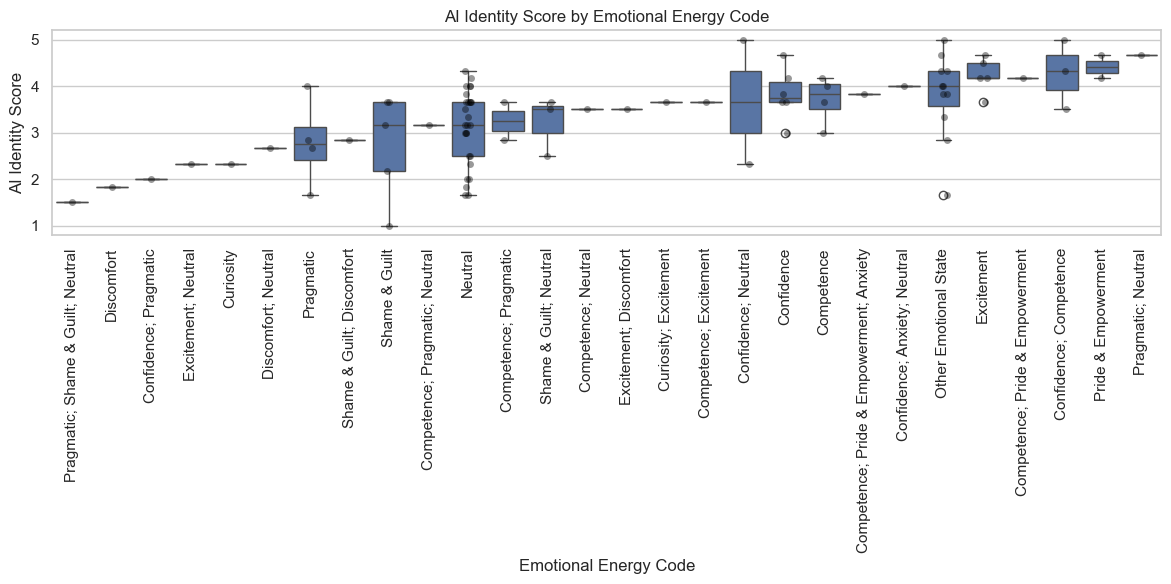

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sort groups by median ai_score
order = (
    df_anova2.groupby('emotional_energy_codes_str')['ai_score']
    .median()
    .sort_values()
    .index
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='emotional_energy_codes_str',
    y='ai_score',
    data=df_anova2,
    order=order
)
sns.stripplot(
    x='emotional_energy_codes_str',
    y='ai_score',
    data=df_anova2,
    order=order,
    color='black',
    alpha=0.4,
    jitter=True
)
plt.title('AI Identity Score by Emotional Energy Code')
plt.xlabel('Emotional Energy Code')
plt.ylabel('AI Identity Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [60]:
# Get the last column name
last_col = df_merged.columns[-1]

# Convert to string for the search
rows_with_semicolon = df_merged[df_merged[last_col].astype(str).str.contains(';', na=False)]
print(rows_with_semicolon)

# Duplicate those rows
df_duplicated = pd.concat([df, rows_with_semicolon], ignore_index=True)

     Unnamed: 0 employment_status                    industry  \
2             2               Yes                   IT / Tech   
9             9               Yes        Education / Academia   
10           10               Yes                   IT / Tech   
15           15               Yes        Education / Academia   
20           20               Yes                   IT / Tech   
27           27               Yes                   IT / Tech   
28           28               Yes  Government / Public sector   
34           34               Yes        Education / Academia   
36           36               Yes            Creative / Media   
40           40               Yes                   IT / Tech   
41           41               Yes                   IT / Tech   
42           42               Yes     Manufacturing industry    
43           43               Yes                   IT / Tech   
48           48               Yes                   IT / Tech   
68           68          

In [61]:
df_duplicated

,Unnamed: 0,employment_status,industry,current_role,years_of_experience,genai_org_approval,genai_use,genai_tools_used,genai_frequency_use,genai_importance,...,age_group,gender,highest_level_of_education,country_of_residence,emotional_energy_score,self_efficacy,relatedness_score,dependence_score,ai_score,emotional_energy_codes_str
0,0,Yes,"IT / Tech, Consulting",CEO,More than 15 years,"ChatGPT (OpenAI), Google Gemini (Formerly Bard...",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard...",Daily,1.0,...,62,Male,Bachelor’s degree,Brazil,4.0,4.111111,5.0,3.0,4.000000,NaN
1,1,Yes,Law,Attorney,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,26-35,Female,Bachelor’s degree,Brazil,3.0,3.222222,1.0,1.0,1.666667,NaN
2,2,Yes,IT / Tech,SDE,1–3 years,no,Yes,"ChatGPT (OpenAI), Claude (Anthropic)",A few times a week,3.0,...,18-25,Male,Master’s degree,Canada,2.0,3.777778,2.0,3.5,2.500000,NaN
3,3,Yes,IT / Tech,ERP Finance Consultant,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,2.0,...,26-35,Female,Bachelor’s degree,Canada,2.0,3.666667,5.0,4.0,3.666667,NaN
4,4,Yes,Creative / Media,Marketing manager,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,1.0,...,26-35,Male,Bachelor’s degree,Egypt,3.0,4.000000,4.0,5.0,4.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,84,Yes,IT / Tech,Software engineer,8–15 years,"Microsoft Copilot, GitHub Copilot",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard...",Daily,5.0,...,26-35,Female,Master’s degree,United Arab Emirates,3.0,5.000000,5.0,5.0,4.333333,Confidence; Competence
138,99,Yes,IT / Tech,NaN,Less than 1 year,"ChatGPT (OpenAI), Claude (Anthropic), Microsof...",Yes,"ChatGPT (OpenAI), Claude (Anthropic), Microsof...",Daily,3.0,...,18-25,Male,Bachelor’s degree,India,4.0,3.222222,2.0,1.0,2.333333,Excitement; Neutral
139,110,Yes,IT / Tech,Test developer - production,8–15 years,"Google Gemini (Formerly Bard), Claude (Anthropic)",Yes,"Google Gemini (formerly Bard), Claude (Anthropic)",Daily,3.0,...,36-45,Male,Master’s degree,Canada,3.0,3.666667,4.0,2.5,3.166667,Competence; Pragmatic; Neutral
140,111,Yes,Consulting,BD,More than 15 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,3.0,...,46-55,Female,Master’s degree,United Arab Emirates,3.0,3.111111,2.0,1.0,2.000000,Confidence; Pragmatic


In [14]:
last_col = df_merged.columns[-1]
repeats = df_merged[last_col].astype('string').str.count(';').fillna(0).astype(int) + 1
df_out = df_merged.loc[df.index.repeat(repeats)].reset_index(drop=True)

NameError: name 'df_merged' is not defined

In [63]:
df_out

,Unnamed: 0,employment_status,industry,current_role,years_of_experience,genai_org_approval,genai_use,genai_tools_used,genai_frequency_use,genai_importance,...,age_group,gender,highest_level_of_education,country_of_residence,emotional_energy_score,self_efficacy,relatedness_score,dependence_score,ai_score,emotional_energy_codes_str
0,0,Yes,"IT / Tech, Consulting",CEO,More than 15 years,"ChatGPT (OpenAI), Google Gemini (Formerly Bard...",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard...",Daily,1.0,...,62,Male,Bachelor’s degree,Brazil,4.0,4.111111,5.0,3.0,4.000000,Other Emotional State
1,1,Yes,Law,Attorney,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,26-35,Female,Bachelor’s degree,Brazil,3.0,3.222222,1.0,1.0,1.666667,Other Emotional State
2,2,Yes,IT / Tech,SDE,1–3 years,no,Yes,"ChatGPT (OpenAI), Claude (Anthropic)",A few times a week,3.0,...,18-25,Male,Master’s degree,Canada,2.0,3.777778,2.0,3.5,2.500000,Shame & Guilt; Neutral
3,2,Yes,IT / Tech,SDE,1–3 years,no,Yes,"ChatGPT (OpenAI), Claude (Anthropic)",A few times a week,3.0,...,18-25,Male,Master’s degree,Canada,2.0,3.777778,2.0,3.5,2.500000,Shame & Guilt; Neutral
4,3,Yes,IT / Tech,ERP Finance Consultant,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,2.0,...,26-35,Female,Bachelor’s degree,Canada,2.0,3.666667,5.0,4.0,3.666667,Shame & Guilt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,115,Yes,Healthcare,Student assistant,1–3 years,I don't know for sure,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,116,Yes,Education / Academia,SHK,Less than 1 year,NaN,Yes,ChatGPT (OpenAI),A few times a week,4.0,...,18-25,Female,Bachelor’s degree,Germany,1.0,3.777778,1.0,2.5,1.500000,Pragmatic; Shame & Guilt; Neutral
143,116,Yes,Education / Academia,SHK,Less than 1 year,NaN,Yes,ChatGPT (OpenAI),A few times a week,4.0,...,18-25,Female,Bachelor’s degree,Germany,1.0,3.777778,1.0,2.5,1.500000,Pragmatic; Shame & Guilt; Neutral
144,116,Yes,Education / Academia,SHK,Less than 1 year,NaN,Yes,ChatGPT (OpenAI),A few times a week,4.0,...,18-25,Female,Bachelor’s degree,Germany,1.0,3.777778,1.0,2.5,1.500000,Pragmatic; Shame & Guilt; Neutral


In [64]:
last_col = df_merged.columns[-1]

# Split on ';' (keep NaN), then explode to one value per row
out = df_merged.copy()
out[last_col] = out[last_col].astype('string').str.split(';')
out = out.explode(last_col, ignore_index=True)

# Clean up: strip spaces and drop blanks/NaN
out[last_col] = out[last_col].astype('string').str.strip()
out = out.dropna(subset=[last_col])
out = out[out[last_col] != '']

# `out` now has one element per row from the semicolon-separated values


In [65]:
out

,Unnamed: 0,employment_status,industry,current_role,years_of_experience,genai_org_approval,genai_use,genai_tools_used,genai_frequency_use,genai_importance,...,age_group,gender,highest_level_of_education,country_of_residence,emotional_energy_score,self_efficacy,relatedness_score,dependence_score,ai_score,emotional_energy_codes_str
0,0,Yes,"IT / Tech, Consulting",CEO,More than 15 years,"ChatGPT (OpenAI), Google Gemini (Formerly Bard...",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard...",Daily,1.0,...,62,Male,Bachelor’s degree,Brazil,4.0,4.111111,5.0,3.0,4.000000,Other Emotional State
1,1,Yes,Law,Attorney,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,26-35,Female,Bachelor’s degree,Brazil,3.0,3.222222,1.0,1.0,1.666667,Other Emotional State
2,2,Yes,IT / Tech,SDE,1–3 years,no,Yes,"ChatGPT (OpenAI), Claude (Anthropic)",A few times a week,3.0,...,18-25,Male,Master’s degree,Canada,2.0,3.777778,2.0,3.5,2.500000,Shame & Guilt
3,2,Yes,IT / Tech,SDE,1–3 years,no,Yes,"ChatGPT (OpenAI), Claude (Anthropic)",A few times a week,3.0,...,18-25,Male,Master’s degree,Canada,2.0,3.777778,2.0,3.5,2.500000,Neutral
4,3,Yes,IT / Tech,ERP Finance Consultant,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,2.0,...,26-35,Female,Bachelor’s degree,Canada,2.0,3.666667,5.0,4.0,3.666667,Shame & Guilt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,111,Yes,Consulting,BD,More than 15 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,3.0,...,46-55,Female,Master’s degree,United Arab Emirates,3.0,3.111111,2.0,1.0,2.000000,Pragmatic
140,114,Yes,Education / Academia,Student,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,18-25,Female,High school or equivalent,Germany,2.0,4.000000,1.0,3.5,2.166667,Shame & Guilt
142,116,Yes,Education / Academia,SHK,Less than 1 year,NaN,Yes,ChatGPT (OpenAI),A few times a week,4.0,...,18-25,Female,Bachelor’s degree,Germany,1.0,3.777778,1.0,2.5,1.500000,Pragmatic
143,116,Yes,Education / Academia,SHK,Less than 1 year,NaN,Yes,ChatGPT (OpenAI),A few times a week,4.0,...,18-25,Female,Bachelor’s degree,Germany,1.0,3.777778,1.0,2.5,1.500000,Shame & Guilt


,Unnamed: 0,employment_status,industry,current_role,years_of_experience,genai_org_approval,genai_use,genai_tools_used,genai_frequency_use,genai_importance,...,general_disapproval,age_group,gender,highest_level_of_education,country_of_residence,emotional_energy_score,relatedness_score,dependence_score,ai_score,emotional_energy_codes_str
0,0,Yes,"IT / Tech, Consulting",CEO,More than 15 years,"ChatGPT (OpenAI), Google Gemini (Formerly Bard...",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard...",Daily,1.0,...,5.0,62,Male,Bachelor’s degree,Brazil,4.0,5.0,3.0,4.000000,"[""['Other Emotional State']""]"
1,1,Yes,Law,Attorney,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,5.0,26-35,Female,Bachelor’s degree,Brazil,3.0,1.0,1.0,1.666667,"[""['Other Emotional State']""]"
2,2,Yes,IT / Tech,SDE,1–3 years,no,Yes,"ChatGPT (OpenAI), Claude (Anthropic)",A few times a week,3.0,...,3.0,18-25,Male,Master’s degree,Canada,2.0,2.0,3.5,2.500000,"[""['Shame & Guilt', ' Neutral']""]"
3,3,Yes,IT / Tech,ERP Finance Consultant,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,2.0,...,2.0,26-35,Female,Bachelor’s degree,Canada,2.0,5.0,4.0,3.666667,"[""['Shame & Guilt']""]"
4,4,Yes,Creative / Media,Marketing manager,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,1.0,...,4.0,26-35,Male,Bachelor’s degree,Egypt,3.0,4.0,5.0,4.000000,"[""['Pragmatic']""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,109,Yes,Government / Public sector,Mechanical Engineer,8–15 years,Microsoft Copilot,Yes,"ChatGPT (OpenAI), Microsoft Copilot",A few times a week,2.0,...,5.0,26-35,Male,Master’s degree,Qatar,2.0,3.0,2.0,2.333333,"[""['Curiosity']""]"
86,110,Yes,IT / Tech,Test developer - production,8–15 years,"Google Gemini (Formerly Bard), Claude (Anthropic)",Yes,"Google Gemini (formerly Bard), Claude (Anthropic)",Daily,3.0,...,5.0,36-45,Male,Master’s degree,Canada,3.0,4.0,2.5,3.166667,"[""['Competence', ' Pragmatic', ' Neutral']""]"
87,111,Yes,Consulting,BD,More than 15 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,3.0,...,3.0,46-55,Female,Master’s degree,United Arab Emirates,3.0,2.0,1.0,2.000000,"[""['Confidence', ' Pragmatic']""]"
88,114,Yes,Education / Academia,Student,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,4.0,18-25,Female,High school or equivalent,Germany,2.0,1.0,3.5,2.166667,"[""['Shame & Guilt']""]"


In [66]:
df_anova3 = out.dropna(subset=['emotional_energy_codes_str', 'ai_score'])

# Group AI scores by region
groups = [group['ai_score'].values for name, group in df_anova3.groupby('emotional_energy_codes_str')]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 2.9707
P-value: 0.0024


In [67]:
# Tukey's HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df_anova3['ai_score'],                # dependent variable
    groups=df_anova3['emotional_energy_codes_str'],  # group variable
    alpha=0.05
)

print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------
              Anxiety            Competence  -0.1667    1.0  -2.258 1.9246  False
              Anxiety            Confidence  -0.1346    1.0 -2.2359 1.9667  False
              Anxiety             Curiosity  -0.9167 0.9909 -3.6832 1.8498  False
              Anxiety            Discomfort  -1.2083 0.8525 -3.6042 1.1875  False
              Anxiety            Excitement  -0.1019    1.0 -2.2645 2.0608  False
              Anxiety               Neutral  -0.7543 0.9766   -2.76 1.2515  False
              Anxiety Other Emotional State  -0.1136    1.0 -2.2403  2.013  False
              Anxiety             Pragmatic  -1.0167 0.8949 -3.1596 1.1263  False
              Anxiety   Pride & Empowerment   0.2917    1.0 -2.1042 2.6875  False
              An

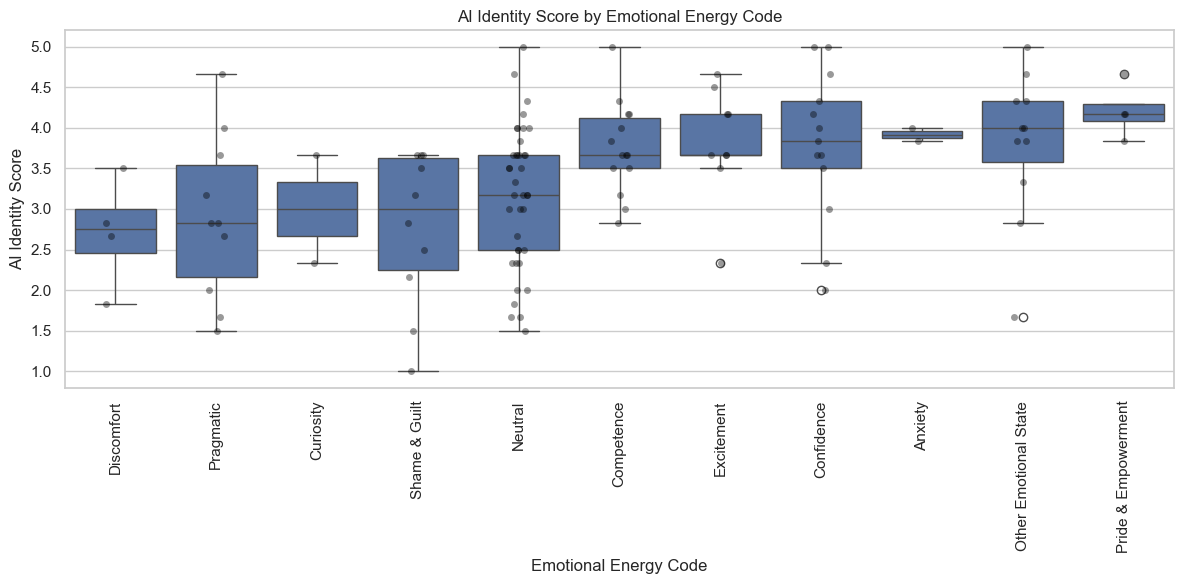

In [68]:

# Sort groups by median ai_score
order = (
    df_anova3.groupby('emotional_energy_codes_str')['ai_score']
    .median()
    .sort_values()
    .index
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='emotional_energy_codes_str',
    y='ai_score',
    data=df_anova3,
    order=order
)
sns.stripplot(
    x='emotional_energy_codes_str',
    y='ai_score',
    data=df_anova3,
    order=order,
    color='black',
    alpha=0.4,
    jitter=True
)
plt.title('AI Identity Score by Emotional Energy Code')
plt.xlabel('Emotional Energy Code')
plt.ylabel('AI Identity Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [75]:
counts = out['emotional_energy_codes_str'].value_counts()
out_filtered = out[out['emotional_energy_codes_str'].isin(counts[counts >= 5].index)]
out_filtered = out[out['emotional_energy_codes_str'].isin(counts[counts < 15].index)]

In [76]:
df_anova3 = out_filtered.dropna(subset=['emotional_energy_codes_str', 'ai_score'])

# Group AI scores by region
groups = [group['ai_score'].values for name, group in df_anova3.groupby('emotional_energy_codes_str')]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 2.9539
P-value: 0.0050


In [77]:
# Tukey's HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df_anova3['ai_score'],                # dependent variable
    groups=df_anova3['emotional_energy_codes_str'],  # group variable
    alpha=0.05
)

print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------
              Anxiety            Competence  -0.1667    1.0 -2.2085 1.8752  False
              Anxiety            Confidence  -0.1346    1.0 -2.1863  1.917  False
              Anxiety             Curiosity  -0.9167 0.9821 -3.6178 1.7845  False
              Anxiety            Discomfort  -1.2083 0.7978 -3.5476 1.1309  False
              Anxiety            Excitement  -0.1019    1.0 -2.2134 2.0097  False
              Anxiety Other Emotional State  -0.1136    1.0   -2.19 1.9627  False
              Anxiety             Pragmatic  -1.0167  0.849  -3.109 1.0756  False
              Anxiety   Pride & Empowerment   0.2917    1.0 -2.0476 2.6309  False
              Anxiety         Shame & Guilt    -1.15 0.7347 -3.2423 0.9423  False
           Compe